<a href="https://colab.research.google.com/github/avangelizer/internship/blob/master/cleaning_data_kmeans_21_10_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from underwater.underwater.config import index, url
#from underwater.underwater.utils import load_series, series_range_0_1, reshape_series_images, to_gray, resizing_imgs_series, visualize_kmeans, visualizing


In [0]:
def read_csv_from_url(url):
  import requests
  import pandas as pd
  from io import BytesIO
  from zipfile import ZipFile
  content = requests.get(url)
  # unzip the content
  
  f = ZipFile(BytesIO(content.content))
  print(f.namelist())
  with f.open(f.namelist()[0], 'r') as g: 
    df = pd.read_csv(g)
  return df
def decode_base64(column):
  
  import base64
  from io import BytesIO

  column_decoded = column.apply(lambda x: BytesIO(base64.b64decode(x.split(":")[1])))
  return column_decoded



def readb64(uri):
  import base64
  import cv2
  import numpy as np
  encoded_data = uri.split(':')[1]
  nparr = np.fromstring(base64.b64decode(encoded_data), np.uint8) 
  imageBGR = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
  imageRGB = cv2.cvtColor(imageBGR , cv2.COLOR_BGR2RGB)
  return imageRGB

def load_series(url):
  
  df = read_csv_from_url(url)
  #ThumbnailImage = df.ThumbnailImage
  PreviewImage = df.PreviewImage
  to_array = PreviewImage.apply(lambda x: readb64(x))

  return to_array

def series_range_0_1(series):
 
  series = series / 255
  
  return series
def reshape_image(image):
  # Load Image and transform to a 1D numpy array.
  #w, h, d = original_shape = tuple(image.shape)
  w, h= original_shape = tuple(image.shape)
  #assert d == 3
  #image_array = np.reshape(image, (w * h * d))
  image_array = np.reshape(image, (w * h))
  return image_array
def reshape_series_images(series):
  series = series.apply(lambda x: reshape_image(x))
  return series

def visualizing(images):
  #images is 3D array
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(images.shape[0], 1, figsize=(20, 20))

  for axi, image in zip(ax.flat, images):
      image =image.reshape(256, 256)
      axi.set(xticks=[], yticks=[])
      axi.imshow(image, interpolation='nearest', cmap=plt.cm.binary)

  
  pass

def resizing_img(img, shape=(256, 256)):
  """
  input:  a numpy array
  output: resized array in the desired shape
  """
  import cv2
  import numpy as np
  res = cv2.resize(img, dsize=shape, interpolation=cv2.INTER_AREA) 
  return res

def resizing_imgs_series(series, shape=(256, 256)):
  """
  series where each row is a numpy array (image) 
  """
  res = series.apply(lambda x: resizing_img(x,shape)) 
  return res
def image_to_gray(image):
  """
  input: a numpy array(image in RGB)
  output:a numpy array(image in grayscale)
  """
  import cv2
  return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def to_gray(series):
  """
  input: series where each row is a numpy array(image in RGB)
  output:series where each row is a numpy array(image in grayscale)
  """
  return series.apply(lambda x: image_to_gray(x))


def visualize_kmeans(y, x,cluster_centers_):
  """
  input:
  -y: the result of kmeans.fit_predict()
  -x: the input data of shape(n_samples, n_features)
  -cluster_centers_: the result of kmeans.fit().cluster_centers_
  """
  import matplotlib.pyplot as plt
  #Visualising the clusters
  plt.scatter([x[y_kmeans == 0, 0]], [x[y_kmeans == 0, 1]], s = 100, c = 'red', label = '0')
  plt.scatter([x[y_kmeans == 1, 0]], [x[y_kmeans == 1, 1]], s = 100, c = 'blue', label = '1')
  
  #Plotting the centroids of the clusters
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

  plt.legend()
  pass
 
  


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
url = "https://b2drop.eudat.eu/s/FHdjkB6zyjLTLdb/download"
series = load_series(url)


['All_Exif_metadata_ session_2019_01_26_kite_Le_Morne_Ambulante_Nord .csv']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [0]:
#images to drop : 0-140,142,147,148,153,160,165,168,169,173,181,183,186,187,188,189,190,192,193,201,202,203,210,211,215,216,218,222,226,228,232,233,236,237,242,245,262
#264-267,269,279,280,282,284,286,287,291,292,293,296,297,299,300,301,305,309,315-368,382,385-390,396,406,413,426,428,433,438,440,442,451,453,457,461,469,470,476,
#490,491,496,505,520,528,530,534,537,538,541-543,545-548,550,554,555,559,562,566,572-574,577,582-584,591,593,605,607,626,630,636,638,646,650,652,662,674
#679,684,689,692,693,702-721,729,730,735-799,802,810,816,817,820,822,824, 830, 832-834,846, 8551,854,864,885,886,892,898, 909,911,919-921,938,948,956,985,990,996,1000
#1005,1006,1024,1032,1036,1037,1039,1042,1043,1045,1050,1059,1061,1065,1074,1080,1084,1090-1104,1105,1109,1114-1116,1122,1126,1128,1141,1147,1154,1155,1165:1180,1182-1183,
#1190,1193,1197,1200:1257,1259,1260,1283,1289,1293,1296:1305,1307:1342,1346,1347,1373,1390,1400,1405,1409,1416,1417,1427,1431:1445,1449:1455,1465,1471,
#1476,1494,1499:1501,1506,1507,1509,1511:1516,1521,1528,1529:1700,1706,1709,1713,1730,1740,1741,1748,1751,1755:1759,1768,1770,1771,1773:1781,1782:1785,1787:1794
#1796,1799,1801,1802,1812,1823,1828,1831,1843,1846,1850:1870,1873,1874,1875:1940,1942,1946,1954,1963,1969,1971,1980,1999,2004,2009,2010,2016,2024,2035,2036,2036,
#2042,2043,2045:2057,2058,2060,2072,2081,2086,2089,2091,2100,2101,2104,2107,2116,2125,2126,2134:2138,2142,2144,2147,2156,2160:2172,2177,2181,2183:2237,2248,2260:2263,
#2264,2271,2275,2277,2282,2291,2296,2300,2305,2316,2322,2325,2326,2328,2329,2331,2344,2347:2350,2351:2354,2355:2361,2364:2368,2371,2376,2385,2386,2398,2406,2410:2415,2416:2420
#2426,2443,2444,2476,2490:2494,2505,2507,2509:2525,2530,2544:2602,2621:2625,2625,2627,2628,2633,2634,2638,2651:2742,2750,2755,2762,2764:2769,2777,2784,2790,2806,2803
#2806,2808,2813,2818,2829,2836,2838,2840,2841,2848,2854,2856:2862,2863,2865:2869,2871:2873,2874,2880,2887,2889,2890,2894,2897,2898,2901,2910,2913,2914,2915,2918:2923,2924,
#2925:2927,2929,2936,2940,2951,2959,2961,2967,2970,2978,2980,2987,2992,3001,3005,3014,3020,3028,3032,3036,3037,3039,3040,3047:3053,3055:3060,3062:3065,3066,3067,3071,3072,3075
#3077:3080,3083,3084,3086,3089,3090,3091,3093,3097,3100,3102,3108,3113,3114,3117,3121,3126,3128,3140:3142,3140:3147,3148:3151,3151,3154:3159,3159:3169,3173,3174,3176,3178,3179,3181,3182,
#3185,3190,3191,3197,3201,3202,3236,3240,3244,3246,3248,3249,3252,3253,3256,3257:3261,3262,3263,3278:3335,3335,3336,3353,3356,3361,3366,3367,3377:3439,3448,3461,3462,3466,
#3479,3480,3482,3490,3491,3502,3508,3513,3519,3523,3524,3525,3530:3537,3540,3541,3545:3550,3551,3557:3561,3570,3571,3580,3584,3592,3593,3597,3601,3603,3610,3613,3614,
#3615,3617:3620,3620,3622,3623,3626:3629,3635,3636,3637,3640:3643,3644,3648:3656,3657:3664,3665:3668,3674,3676:3680,3691,3692,3701,3705,3706,3723,3728,3729,3733,3734,3739,
#3740:3743,3745:3748,3749,3752,3761,3765:3830,3844,3847,3851,3856,3870,3873,3875,3878,3888,3892,3899,3905,3910,3923,3928,3929,3930:3935,3938,3942,3946,3949,3961:3964,3965,3968,3969,
#3970,3971,3994,3995,4003,4004,4005:4010,4025,4027,4031,4036,4039,4042:4045,4046,4051,4058,4065,4069,4071,4072,4081:4085,4085:4092,4093,4094,4096,4097,4100,4104,4106,
#4107,4105,4112,4113,4126:4181,4193:4200,4201:4204,4206,4212,4218,4222,4228,4229,4230,4231,4233,4239,4246,4260,4264:4301,4304:4307,4313:4316,4324,4327:4330,4332,4333,
#4335,4337,4340,4342,4344,4350:4355,4356,4357,4359:4381,4382,4401,4405,4409,4429,4430,4432,4434,4436:4440,4441:4445,4446,4450,4454,4459:4515,4532,4533,4534,4542,4560,4564
#4572,4575,4577,4603:4638,4639:4650,4651:4691,4696,4701:4710,4730,4732,4734,4741,4745,4751:4755,4762,4764,4774:4785,4791,4800:4895,4912:4920,4922,4934
#4941,4959,4963,4967,4968,4971,4981,4985,4986,4993:4998

The last index USED: 2990:5000

#Dropping the unwanted pics

In [0]:
index=list(range(0,141))
index.extend([142,147,148,153,160,165,168,169,173,181,183,186,187,188,189,190,192,193,201,202,203,210,211,215,216,218,222,226,228,232,233,236,237,242,245,262])
index.extend(list(range(264,268)))
index.extend([269,279,280,282,284,286,287,291,292,293,296,297,299,300,301,305,309, 382,396,406,413,426,428,433,438,440,442,451,
              453,457,461,469,470,476,490,491,496,505,520,528,530,534,537,538,550,554,555,559,562,566,577, 
              591,593,605,607,626,630,636,638,646,650,652,662,674,679,684,689,692,693,729,730,802,810,816,817,820,822,824, 830,
             846, 8551,854,864,885,886,892,898, 909,911,938,948,956,985,990,996,1000,1005,1006,1024,1032,1036,1037,1039,1042,
              1043,1045,1050,1059,1061,1065,1074,1080,1084,1105,1109,1122,1126,1128,1141,1147,1154,1155,
             1190,1193,1197,1259,1260,1283,1289,1293,1346,1347,1373,1390,1400,1405,1409,1416,1417,1427,1465,1471,1476,1494,
              1506,1507,1509,1521,1528,1706,1709,1713,1730,1740,1741,1748,1751,1768,1770,1771,1796,1799,1801,1802,1812,1823,1828,1831,1843,1846,
              1873,1874,1942,1946,1954,1963,1969,1971,1980,1999,2004,2009,2010,2016,2024,2035,2036,2036,2042,2043,
              2058,2060,2072,2081,2086,2089,2091,2100,2101,2104,2107,2116,2125,2126,2142,2144,2147,2156,2177,2181,
              2248,2371,2376,2385,2386,2398,2406,2426,2443,2444,2476,2505,2507,2530,2625,2627,2628,2633,2634,2638,
              2750,2755,2762,2777,2784,2790,2806,2803,2806,2808,2813,2818,2829,2836,2838,2840,2841,2848,2854,2863,
              2874,2880,2887,2889,2890,2894,2897,2898,2901,2910,2913,2914,2915,2924,2929,2936,2940,2951,2959,2961,
              2967,2970,2978,2980,2987,2992,3001,3005,3014,3020,3028,3032,3036,3037,3039,3040,3066,3067,3071,3072,3075,
              3083,3084,3086,3089,3090,3091,3093,3097,3100,3102,3108,3113,3114,3117,3121,3126,3128,3151,3173,3174,3176,
              3178,3179,3181,3182,3185,3190,3191,3197,3201,3202,3236,3240,3244,3246,3248,3249,3252,3253,3256,
              3262,3263,3335,3336,3353,3356,3361,3366,3367,3448,3461,3462,3466,3479,3480,3482,3490,3491,3502,3508,3513,3519,3523,3524,3525,
              3540,3541,3551,3570,3571,3580,3584,3592,3593,3597,3601,3603,3610,3613,3614,3615,3620,3622,3623,3635,3636,3637,3644,3674,3691,
              3692,3701,3705,3706,3723,3728,3729,3733,3734,3739,3749,3752,3761,3844,3847,3851,3856,3870,3873,3875,3878,3888,3892,3899,3905,
              3910,3923,3928,3929,3938,3942,3946,3949,3965,3968,3969,3970,3971,3994,3995,4003,4004,4025,4027,4031,4036,4039,
              4046,4051,4058,4065,4069,4071,4072,4093,4094,4096,4097,4100,4104,4106,4107,4105,4112,4113,4206,4212,4218,4222,
              4228,4229,4230,4231,4233,4239,4246,4260,4324,4332,4333,4335,4337,4340,4342,4344,4356,4357,4382,4401,4405,4409,
              4429,4430,4432,4434,4446,4450,4454,4532,4533,4534,4542,4560,4564,4572,4575,4577,4696,4730,4732,4734,4741,4745,
              4762,4764,4791,4922,4934,4941,4959,4963,4967,4968,4971,4981,4985,4986

             ])
index.extend(list(range(315,369)))

index.extend(list(range(385,391)))
index.extend(list(range(541,544)))
index.extend(list(range(545,549)))
index.extend(list(range(572,575)))
                   
index.extend(list(range(582,585)))
                  
index.extend(list(range(702,722)))
index.extend(list(range(735,780)))
                   
index.extend(list(range(832,835)))
                   
index.extend(list(range(919,922)))
                   
index.extend(list(range(1090,1105)))
                   
index.extend(list(range(1114,1117)))

index.extend(list(range(1165,1180)))
index.extend(list(range(1182,1184)))

index.extend(list(range(1200,1257)))
                   
index.extend(list(range(1296,1305)))
index.extend(list(range(1307,1342)))
                   
index.extend(list(range(1431,1445)))
index.extend(list(range(1449,1455)))
index.extend(list(range(1499,1501)))
                   
index.extend(list(range(1511,1516)))
                   
index.extend(list(range(1529,1700)))
                   
index.extend(list(range(1755,1759)))
                   
index.extend(list(range(1773,1781)))
index.extend(list(range(1782,1785)))
index.extend(list(range(1787,1794))) 
index.extend(list(range(1850,1870)))
index.extend(list(range(1875,1940)))

index.extend(list(range(2045,2057)))
index.extend(list(range(2134,2138)))
index.extend(list(range(2160,2172)))
index.extend(list(range(2183,2237)))

index.extend(list(range(2260,2263)))
index.extend(list(range(2347,2350)))
index.extend(list(range(2351,2354)))
index.extend(list(range(2355,2361)))
index.extend(list(range(2364,2368)))
                        
index.extend(list(range(2410,2415)))
index.extend(list(range(2416,2420)))

index.extend(list(range(2490,2494)))
index.extend(list(range(2509,2525)))
index.extend(list(range(2544,2602)))
index.extend(list(range(2621,2625)))
index.extend(list(range(2651,2742)))
index.extend(list(range(2764,2769)))
index.extend(list(range(2856,2862)))
index.extend(list(range(2865,2869)))
index.extend(list(range(2871,2873)))
index.extend(list(range(2918,2923)))
                        
index.extend(list(range(2925,2927)))
                        
index.extend(list(range(3047,3053)))
index.extend(list(range(3055,3060)))
index.extend(list(range(3062,3065)))
                        
index.extend(list(range(3077,3080)))
                        
index.extend(list(range(3140,3142)))
index.extend(list(range(3140,3147)))
index.extend(list(range(3148,3151)))
                        
index.extend(list(range(3154,3159)))
index.extend(list(range(3159,3169)))

index.extend(list(range(3257,3261)))
index.extend(list(range(3278,3335)))
index.extend(list(range(3377,3439)))
index.extend(list(range(3530,3537)))
index.extend(list(range(3545,3550)))
index.extend(list(range(3557,3561)))
index.extend(list(range(3617,3620)))
index.extend(list(range(3626,3629)))
index.extend(list(range(3640,3643)))
index.extend(list(range(3648,3656)))
index.extend(list(range(3657,3664)))
index.extend(list(range(3665,3668)))
index.extend(list(range(3676,3680)))
index.extend(list(range(3740,3743)))
index.extend(list(range(3745,3748)))
index.extend(list(range(3765,3830)))
index.extend(list(range(3930,3935)))
index.extend(list(range(3961,3964)))
index.extend(list(range(4005,4010)))
index.extend(list(range(4042,4045)))
index.extend(list(range(4081,4085)))
index.extend(list(range(4085,4092)))
index.extend(list(range(4126,4181)))
index.extend(list(range(4193,4200)))
index.extend(list(range(4201,4204)))
index.extend(list(range(4264,4301)))
index.extend(list(range(4304,4307)))
index.extend(list(range(4313,4316)))
index.extend(list(range(4327,4330)))
index.extend(list(range(4350,4355)))
index.extend(list(range(4359,4381)))
index.extend(list(range(4436,4440)))
index.extend(list(range(4441,4445)))
index.extend(list(range(4459,4515)))
index.extend(list(range(4603,4638)))
index.extend(list(range(4639,4650)))
index.extend(list(range(4651,4691)))
index.extend(list(range(4701,4710)))
index.extend(list(range(4751,4755)))
index.extend(list(range(4774,4785)))
index.extend(list(range(4800,4895)))
index.extend(list(range(4912,4920)))
index.extend(list(range(4993,4998)))





In [0]:
series_filtered = series.drop(series.index[index], axis=0)
del index

#Converting to grayscale

In [0]:
s_gray_imgs = to_gray(series_filtered[:2694])


#Resizing images to 600x600x3

In [0]:
s_res_gray_imgs = resizing_imgs_series(s_gray_imgs)

In [8]:
s_res_gray_imgs.iloc[0].shape

(256, 256)

In [9]:
s_res_gray_imgs.index

Int64Index([ 141,  143,  144,  145,  146,  149,  150,  151,  152,  154,
            ...
            4987, 4988, 4989, 4990, 4991, 4992, 4998, 4999, 5000, 5001],
           dtype='int64', length=2694)

In [0]:
#del series
series_normalized = series_range_0_1(s_res_gray_imgs)

In [0]:
#series_normalized_100 = series_range_0_1(series[4990:5000 ])
series_m_resh = reshape_series_images(series_normalized)
#visualizing(series_m_resh)

In [18]:
series_m_resh.shape

(2694,)

In [19]:
del s_res_gray_imgs
del series_normalized
series_to_array = np.matrix(series_m_resh.tolist()) #I worked  hard on this one! Yoopy
series_to_array.shape

(2694, 65536)

In [0]:
#float_series = series_m_resh.as_matrix()#.reshape(series_m_resh.shape[0], series_m_resh[0].shape[0])


#Saving modified series as csv

In [0]:
#filtered_series = df[~df.index.isin(list_to_exclude)]
#series_to_array.to_csv("interim.csv")

In [0]:
from sklearn.cluster import KMeans, MiniBatchKMeans
batch_size = 45
kmeans = MiniBatchKMeans(n_clusters=2, batch_size=batch_size).fit(series_to_array)
y_kmeans = MiniBatchKMeans(n_clusters=2, batch_size=batch_size).fit_predict(series_to_array)

In [0]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [0]:
cluster_centers.shape



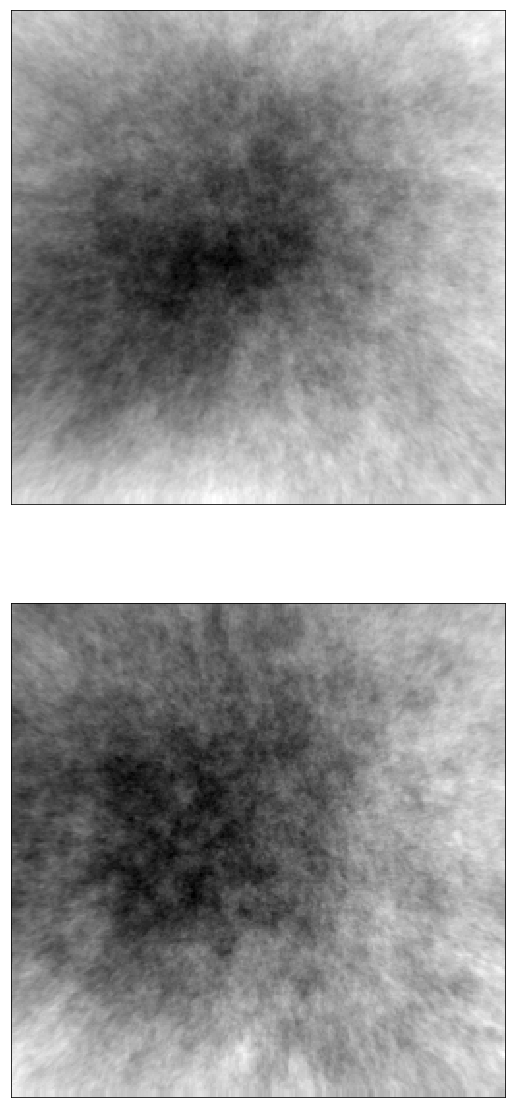

In [22]:
visualizing(cluster_centers)

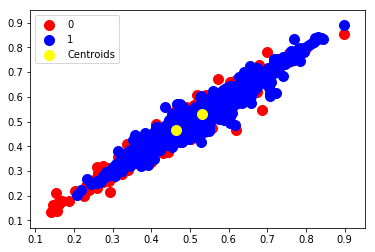

In [23]:
visualize_kmeans(y_kmeans, series_to_array, cluster_centers )